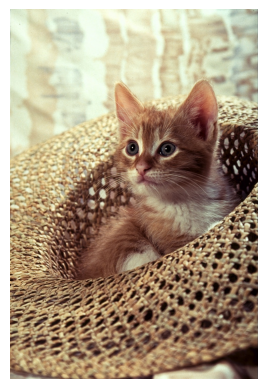

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image file
image_path = 'cat.png'

# Read the image using imread function from matplotlib.image
img = mpimg.imread(image_path)

# Display the image using imshow function from matplotlib.pyplot
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [3]:
import numpy as np

height, width, channels = img.shape

# Reshape the image array to a 2D array of shape (number of pixels, 3)
pixel_data = np.reshape(img, (height * width, channels))

print("Dimensions of original image array:", img.shape)
print("Dimensions of reshaped pixel data:", pixel_data.shape)

Dimensions of original image array: (733, 490, 3)
Dimensions of reshaped pixel data: (359170, 3)


In [4]:
from sklearn.cluster import KMeans
# Perform K-means clustering
k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(pixel_data)

KMeans(n_clusters=10, random_state=0)

In [5]:
# Replace each pixel by its cluster center
compressed_data = kmeans.cluster_centers_[kmeans.labels_]

# Reorganize the pixels into a 3D array to show the image
compressed_image = np.reshape(compressed_data, (height, width, channels))

# Display the original and compressed images
plt.figure(figsize=(8, 4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

(-0.5, 489.5, 732.5, -0.5)

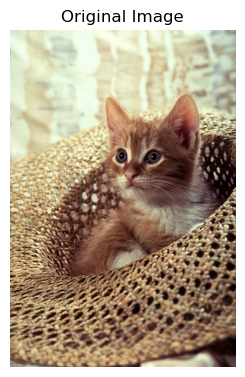

In [6]:
# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

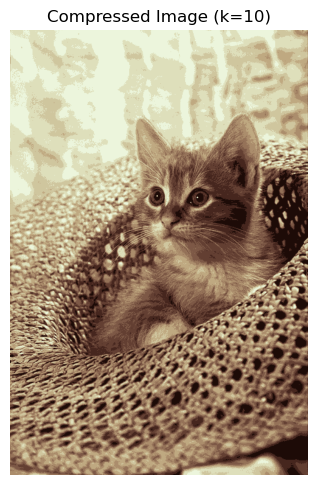

In [7]:
# Compressed Image
plt.subplot(1, 2, 2)
plt.title(f'Compressed Image (k={k})')
plt.imshow(compressed_image)
plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Save the compressed image
plt.imsave('compressed.png', compressed_image)

In [9]:
# Perform Mean Shift clustering
from sklearn.cluster import MeanShift, estimate_bandwidth
# Estimate bandwidth (used to determine the radius for data points to be considered in Mean Shift)
bandwidth = estimate_bandwidth(pixel_data, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pixel_data)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Replace each pixel by its cluster center
compressed_data = cluster_centers[labels]
compressed_image = np.reshape(compressed_data, (height, width, channels))

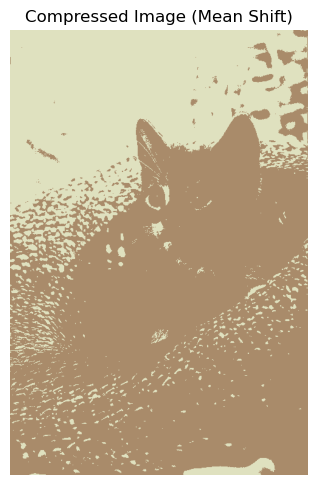

In [10]:
plt.subplot(1, 2, 2)
plt.title('Compressed Image (Mean Shift)')
plt.imshow(compressed_image)
plt.axis('off')

plt.tight_layout()
plt.show()